In [ ]:
%matplotlib inline

In [ ]:
! pip install scikit-learn==0.24.1 # install this version since otherwise confusion matrix return bad results

     |████████████████████████████████| 22.3 MB 52.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


# Riconoscere tipologia di iris dalle caratteristiche dei petali
Utilizziamo scikit-learn e vari classificatori noti per riconoscere la tipologia di iris tra setosa, versicolor e virginica!

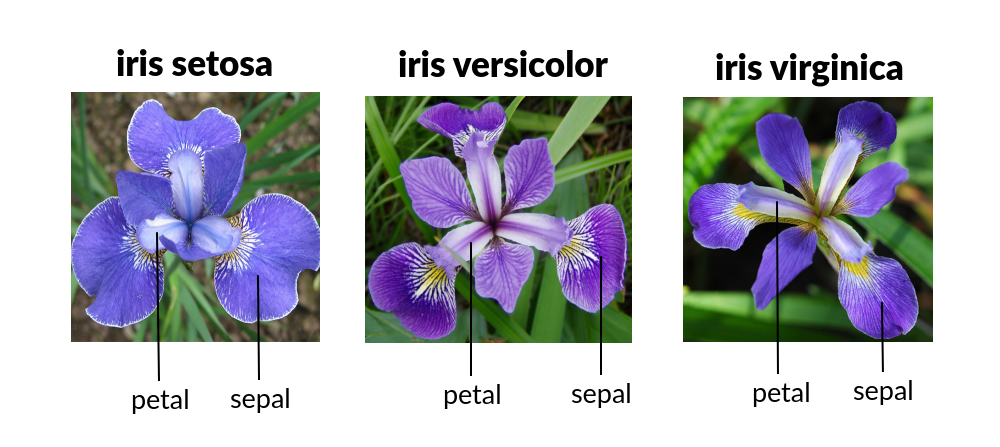

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 

# Import datasets, classifiers and performance metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
import numpy as np
np.random.seed(42)

## Iris dataset

Questo set di dati è costituito da 3 diversi tipi di iris (Setosa, Versicolor e Virginica) caratterizzati da 3 feature: lunghezza del sepalo, larghezza del sepalo, lunghezza del petalo e larghezza del petalo.

L'attributo ``data`` contiene le feature del dataset mentre l'attributo ``target`` contiene la classificazione per quei valori (cioè un numero da 0 a 2).

Stampiamo le prime 4 immagini del dataset!

In [ ]:
iris = datasets.load_iris()
print(type(iris)) # bunch are an extended version of dictionaries

<class 'sklearn.utils.Bunch'>


# Data exploration

### Convert iris to pandas dataframe

In [ ]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = pd.Series(iris.target)

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Data visualization

In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig1 = px.pie(data, names='target', title='Iris type percentage')
fig1.show()

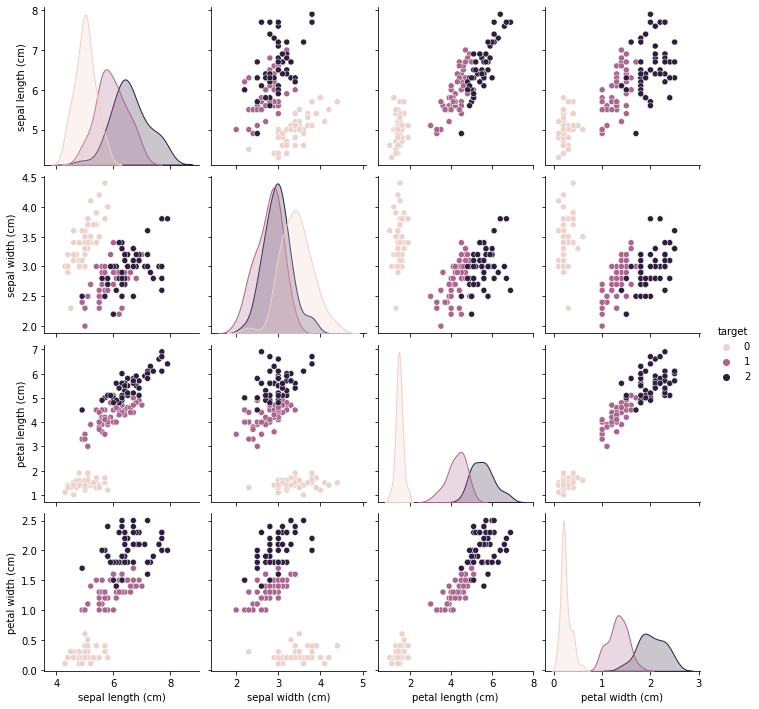

In [ ]:
# Plot relationship in all the dataset
pair_plt = sns.pairplot(data, hue='target')

# Classificazione

Per applicare un classificatore a questi dati, dobbiamo dividere i dati in sottoinsiemi di training e test e scegliere un modello di classificazione su cui fare training! 

Il classificatore adattato può essere successivamente utilizzato per prevedere il valore della cifra per nel test-set!

In [ ]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.7, shuffle=True
)

## Decision trees

In [ ]:
# Create a classifier: a support vector classifier
dtree = DecisionTreeClassifier(criterion="entropy")
# Learn the iris on the train subset
dtree.fit(X_train , y_train)
# Predict the value of the digit on the test subset
predicted = dtree.predict(X_test)

Di seguito visualizziamo i primi 4 campioni di prova e mostriamo le loro previsioni.

La funzione ``classification_report`` mostra tutte le metriche principali per misurare le performance del modello.

In [ ]:
print(
    f"Classification report for classifier {dtree}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier(criterion='entropy'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.90      0.85      0.88        33
           2       0.85      0.91      0.88        32

    accuracy                           0.92       105
   macro avg       0.92      0.92      0.92       105
weighted avg       0.92      0.92      0.92       105




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



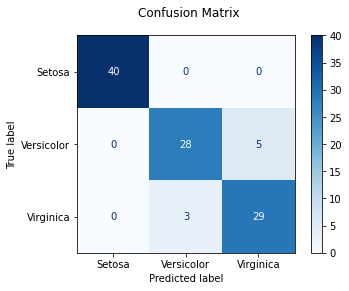

In [ ]:
plot_confusion_matrix(dtree, X_test, y_test,display_labels=["Setosa", "Versicolor","Virginica"],
                             cmap=plt.cm.Blues)
plt.suptitle("Confusion Matrix")
plt.show() 

## Stampiamo l'albero

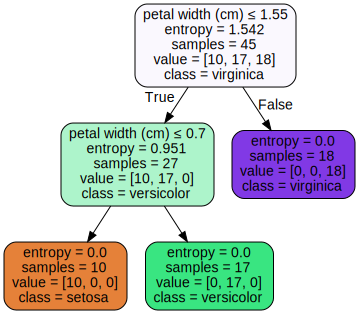

In [ ]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(dtree, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(criterion="entropy")
rforest.fit(X_train , y_train)
predicted = rforest.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {rforest}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(criterion='entropy'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.91      0.91        33
           2       0.91      0.91      0.91        32

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105




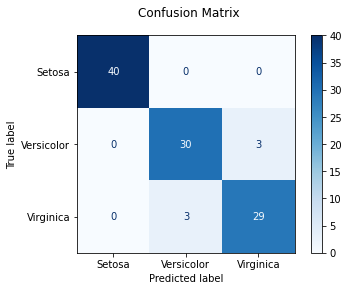

In [ ]:
plot_confusion_matrix(rforest, X_test, y_test,display_labels=["Setosa", "Versicolor","Virginica"],
                             cmap=plt.cm.Blues)
plt.suptitle("Confusion Matrix")
plt.show() 

## Stampiamo il primo albero della foresta!

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


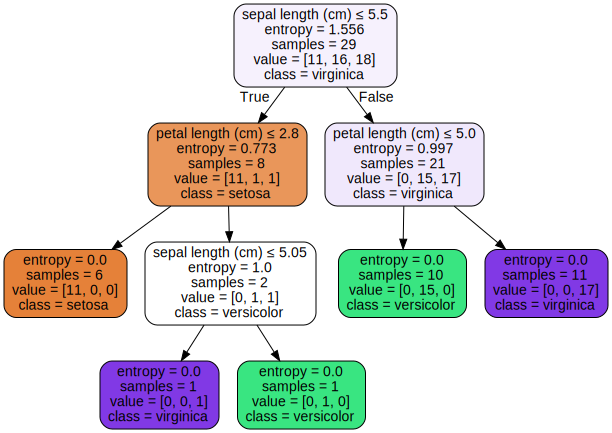

In [ ]:
# Plot the first tree of the random forest
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(rforest.estimators_[0], out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train ,y_train)

KNeighborsClassifier()

In [ ]:
predicted = knn.predict(X_test)
accuracy_score(predicted,y_test)

0.9714285714285714

In [ ]:
print(
    f"Classification report for classifier {rforest}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(criterion='entropy'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.94      0.95        33
           2       0.94      0.97      0.95        32

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105




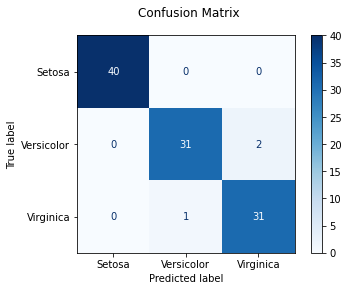

In [ ]:
plot_confusion_matrix(knn, X_test, y_test,display_labels=["Setosa", "Versicolor","Virginica"],
                             cmap=plt.cm.Blues)
plt.suptitle("Confusion Matrix")
plt.show() 